# MSA 2024 Phase 2 - Part 1

Before the very beginning: For this Phase, I chose the "X store soles" folder in the github dataset resource, which contains only one .csv file. This notebook assumes that the dataset file has been stored with the notebook itself at the same place and the name of it is "store_sales.csv". Please check the file before start.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
%matplotlib inline

## 1. Find all variables and understand them

In [2]:
# load the dataset
dataset = pd.read_csv('store_sales.csv', index_col=False, sep=",", header=0, encoding='Windows-1252')

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

It looks like our dataset has 2121 instances, 21 features and has no missing data. Now we want to look at the data set in more detail.

In [3]:
# take a look at the data
dataset.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
5,24,US-2017-156909,7/16/2017,7/18/2017,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196
6,25,CA-2015-106320,9/25/2015,9/30/2015,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3,0.00,240.2649
7,28,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522
8,30,US-2015-150630,9/17/2015,9/21/2015,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,3,0.20,15.5250
9,37,CA-2016-117590,12/8/2016,12/10/2016,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5,0.60,-147.9630


On a preliminary look, our dataset is a dataset of sales transactions, customer statistics, and product details. Because our ultimate goal is to develop a model that predicts sales over the next four weeks, our forecast object should be sales.

Next let's look at the data type of each column.

In [4]:
print(dataset.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


Although there are six columns of numeric type, Row ID and Postal Code are typically used as unique identifiers rather than characteristics for modeling. So we're more interested in the key statistical measures for the other four columns.

In [5]:
# Select numerical columns
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
numerical_data = dataset[numerical_columns]

# Calculate mean and standard deviation
mean = numerical_data.mean()
std_dev = numerical_data.std()

# Print mean and standard deviation
print("mean:")
print(mean)

print("\nstandard deviation:")
print(std_dev)


mean:
Sales       349.834887
Quantity      3.785007
Discount      0.173923
Profit        8.699327
dtype: float64

standard deviation:
Sales       503.179145
Quantity      2.251620
Discount      0.181547
Profit      136.049246
dtype: float64


For these four columns of data, I chose to visualize the data first with histograms and boxplots. These two graphs help us to do basic data exploration and understanding, understand the distribution of each column of data and analyze the distribution characteristics, central trends, and outliers of the data.

Let's draw the histogram first.

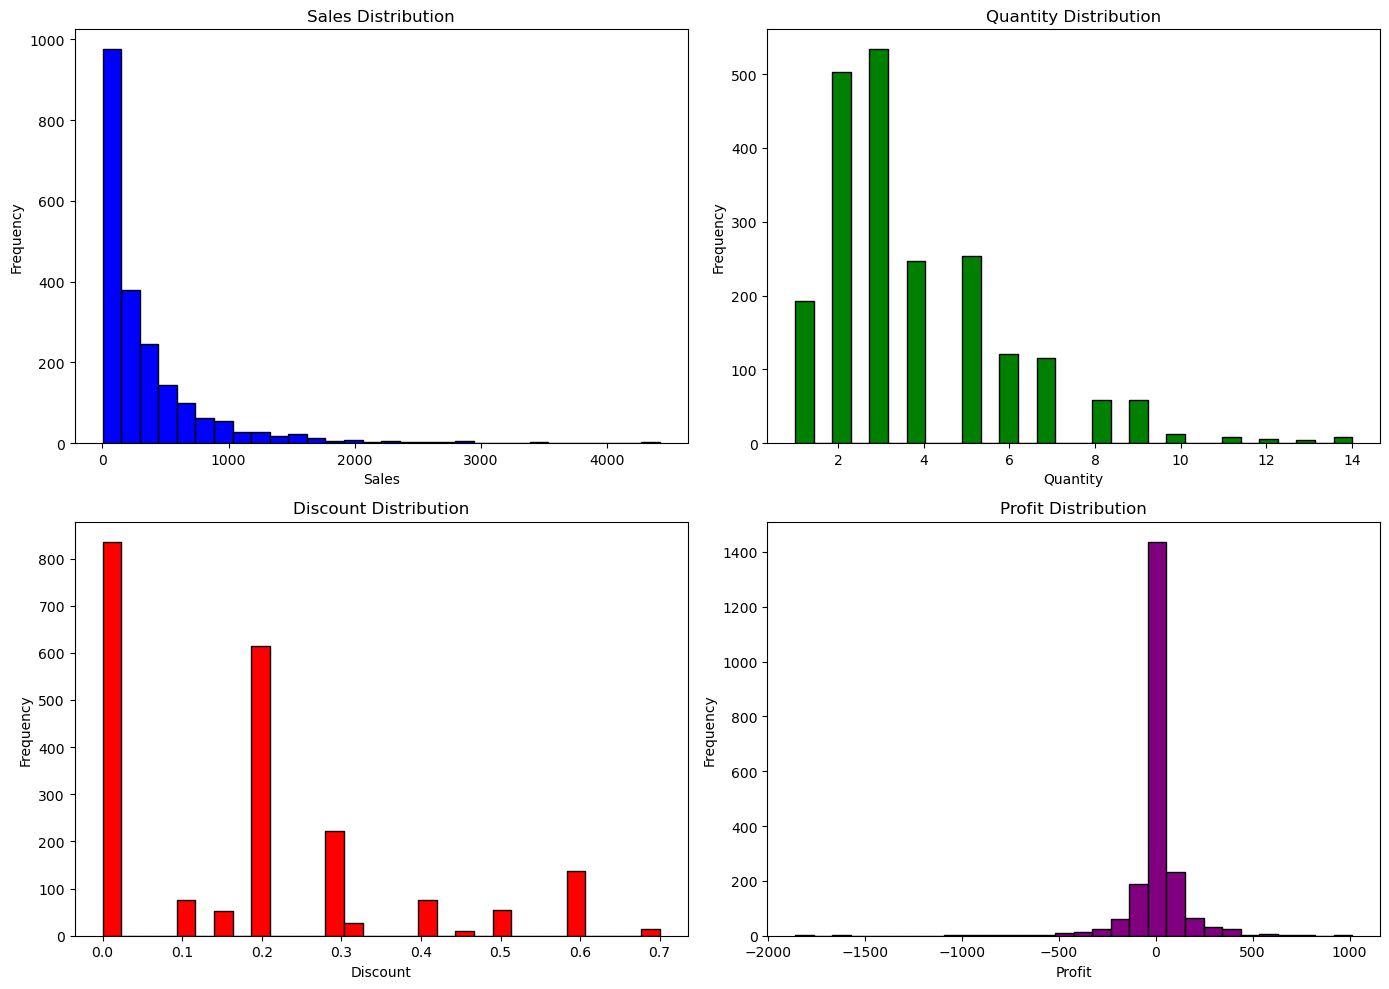

In [6]:
# Plot histograms
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Sales histogram
axs[0, 0].hist(dataset['Sales'], bins=30, color='blue', edgecolor='black')
axs[0, 0].set_title('Sales Distribution')
axs[0, 0].set_xlabel('Sales')
axs[0, 0].set_ylabel('Frequency')

# Quantity histogram
axs[0, 1].hist(dataset['Quantity'], bins=30, color='green', edgecolor='black')
axs[0, 1].set_title('Quantity Distribution')
axs[0, 1].set_xlabel('Quantity')
axs[0, 1].set_ylabel('Frequency')

# Discount histogram
axs[1, 0].hist(dataset['Discount'], bins=30, color='red', edgecolor='black')
axs[1, 0].set_title('Discount Distribution')
axs[1, 0].set_xlabel('Discount')
axs[1, 0].set_ylabel('Frequency')

# Profit histogram
axs[1, 1].hist(dataset['Profit'], bins=30, color='purple', edgecolor='black')
axs[1, 1].set_title('Profit Distribution')
axs[1, 1].set_xlabel('Profit')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


From the histogram, we can see that Sales are mainly concentrated in 0-1000, of which 0-200 sales account for nearly half of the instances. The Quantity is mainly concentrated in 0-6. Discounts have two peaks at 0 and 0.2, and are more even elsewhere. Profits are concentrated between -500 and 500, with 0 or so accounting for more than half of the instances.

Next is the box plot.

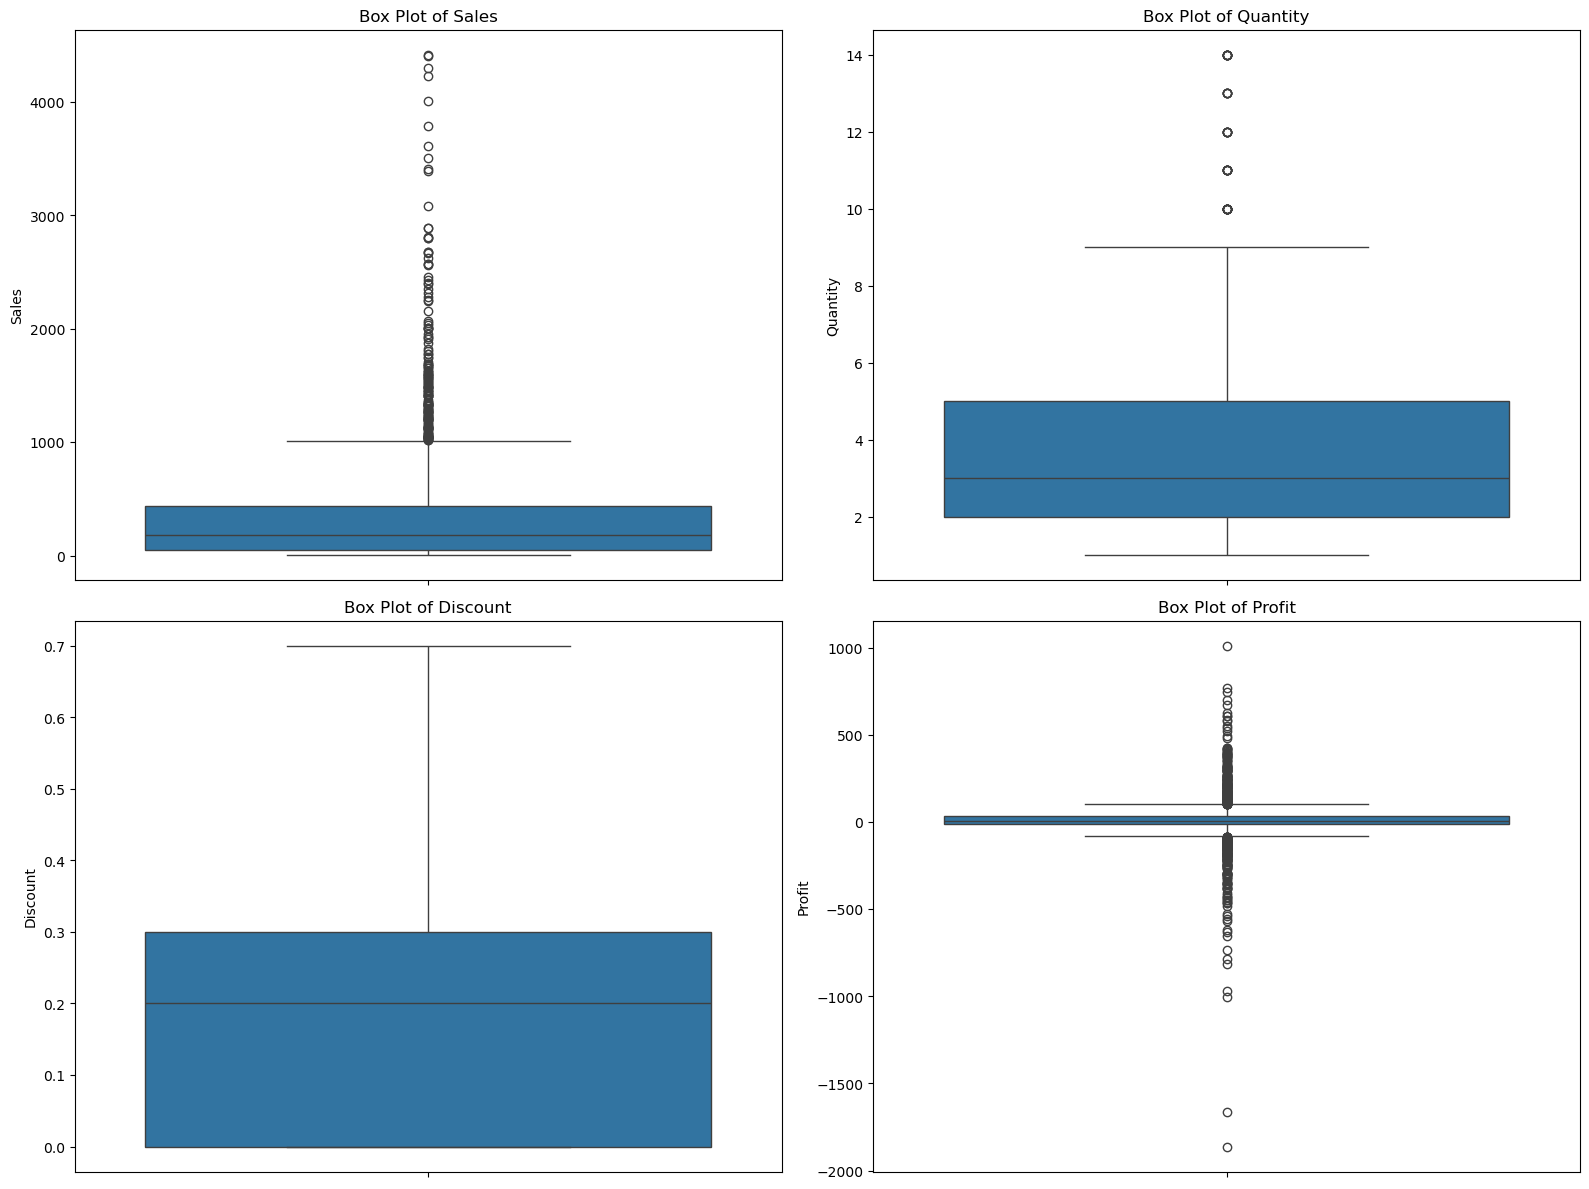

In [7]:
# Set the size of the figure
plt.figure(figsize=(16, 12))

# Create subplots
plt.subplot(2, 2, 1)
sns.boxplot(data=dataset['Sales'])
plt.title('Box Plot of Sales')

plt.subplot(2, 2, 2)
sns.boxplot(data=dataset['Quantity'])
plt.title('Box Plot of Quantity')

plt.subplot(2, 2, 3)
sns.boxplot(data=dataset['Discount'])
plt.title('Box Plot of Discount')

plt.subplot(2, 2, 4)
sns.boxplot(data=dataset['Profit'])
plt.title('Box Plot of Profit')

# Adjust layout
plt.tight_layout()
plt.show()


Things seem a little strange. In the boxplot presented by this dataset, there are obvious outliers in Sales, Quantity and Profit. Sales data mainly focus on 0 to 1000. There are instances from 1000 to 3000. However, more than 3000 instances are rare. It was decided to treat instances above 3000 as outliers. The outliers of Quantity are obvious, i.e., a few instances of Quantity greater than or equal to 10. Outliers for Profit are more difficult to determine. Because this data is very concentrated, simply discarding data outside the horizontal line has a high probability of affecting the performance of the model. In the end, I chose to treat outliers greater than 900 and those less than -900. This is put into practice in the data clean section.

So far, the visualization of the columns of the numeric class is over. But out of curiosity, I used a scatterplot array to explore the correlation between these four sets of data.

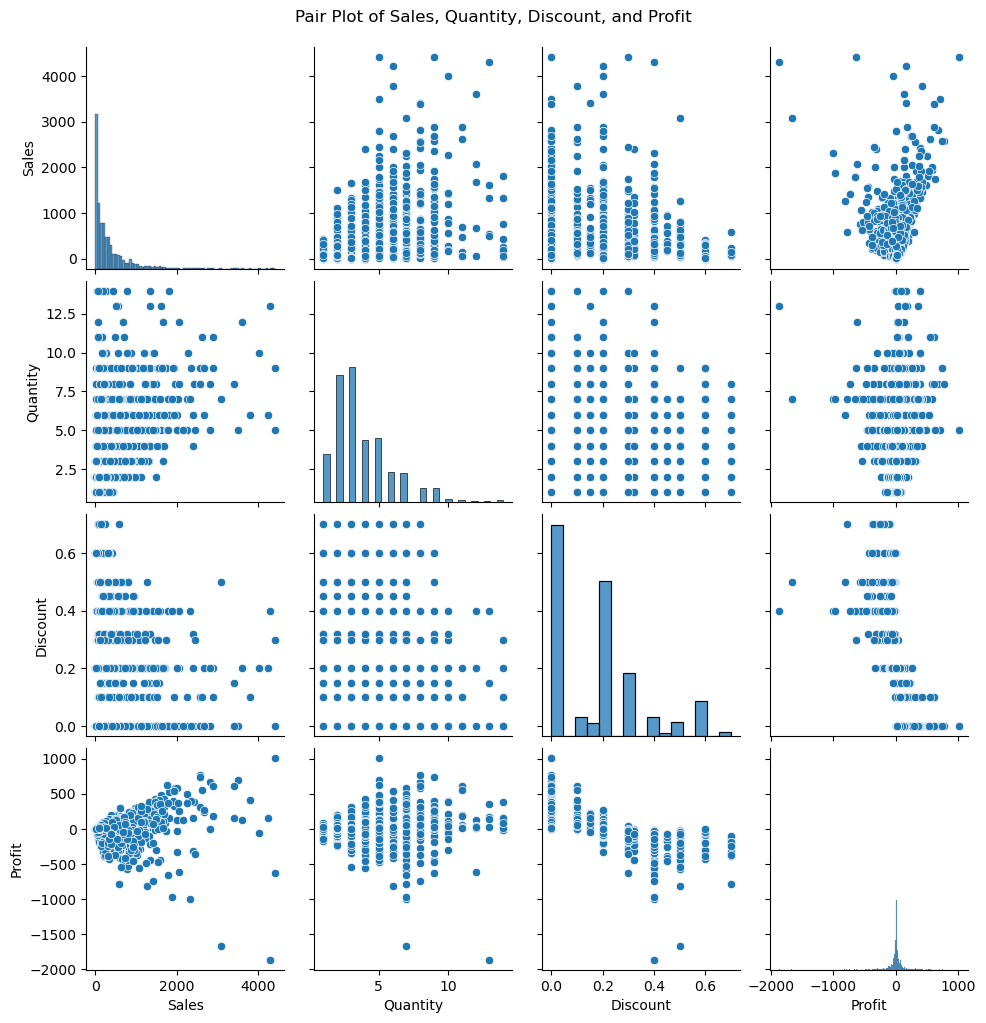

In [8]:
# Plot the scatter plot matrix
sns.pairplot(dataset[['Sales', 'Quantity', 'Discount', 'Profit']])
plt.suptitle('Pair Plot of Sales, Quantity, Discount, and Profit', y=1.02)
plt.show()


In this matrix, we can clearly see that sales is significantly correlated with profit and quantity. This will be helpful for us to select variables in the future.

Next step we are going to convert data types of columns as needed, ensuring all values fed into machine learning models are numerical.

I put this step together with clean data because there are so many actions and thoughts that are related to each other.

## 2. Clean data

As mentioned earlier, there is no missing data in this dataset. This saves us the work of processing the data. 

As we mentioned when we drew the box plot, Sales greater than 3000, Quantity greater than or equal to 10, Profit greater than 900 or less than -900, are regarded as outliers.

In [9]:
dataset = dataset[dataset['Sales'] < 3000]
dataset = dataset[dataset['Quantity'] < 10]
dataset = dataset[dataset['Profit'] < 900]
dataset = dataset[dataset['Profit'] > -900]

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2072 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2072 non-null   int64  
 1   Order ID       2072 non-null   object 
 2   Order Date     2072 non-null   object 
 3   Ship Date      2072 non-null   object 
 4   Ship Mode      2072 non-null   object 
 5   Customer ID    2072 non-null   object 
 6   Customer Name  2072 non-null   object 
 7   Segment        2072 non-null   object 
 8   Country        2072 non-null   object 
 9   City           2072 non-null   object 
 10  State          2072 non-null   object 
 11  Postal Code    2072 non-null   int64  
 12  Region         2072 non-null   object 
 13  Product ID     2072 non-null   object 
 14  Category       2072 non-null   object 
 15  Sub-Category   2072 non-null   object 
 16  Product Name   2072 non-null   object 
 17  Sales          2072 non-null   float64
 18  Quantity     

According to the task requirements, the next step should deal with the unimportant eigenvalues.

Before I do this, I want to investigate the types of values for each column for further analysis of the data and for encoding them.

In [10]:
unique_counts = dataset.nunique()

print(unique_counts)

Row ID           2072
Order ID         1725
Order Date        879
Ship Date         951
Ship Mode           4
Customer ID       702
Customer Name     702
Segment             3
Country             1
City              370
State              48
Postal Code       452
Region              4
Product ID        375
Category            1
Sub-Category        4
Product Name      380
Sales            1588
Quantity            9
Discount           11
Profit           1730
dtype: int64


At this point, I enter the data processing phase that is decisive for the model. We will choose which features to keep, which to remove, which to transform, and how to integrate the data. In practice, I tried more than one version of this step (mentioned after the summary section), and finally decided to integrate the data on a weekly basis. The logic at the bottom of this is that in the source section of the database, we are asked to develop a machine learning model on a weekly basis that predicts four or twelve weeks into the future. 

Through the number of unique values, we further discover the hidden information of the data. 

First, for columns such as Row ID Order ID, Customer ID, Product ID, Customer Name, Product Name, they are only used as unique identifiers and do not actually help in the prediction task of the model. So we can delete it.

Then, for columns such as Ship Mode, Segment, Region, and Sub-Category that have a small number of unique values, we can aggregate them according to the number of transactions per week in a way similar to a single heat code. For example, if three orders in this week's order are in the West region, the Region_East data of this week's data instance is 3. In particular, there is only one unique value for Country and Category, and no encoding is required. We can ignore them.

For example, Quantity, Discount, and Profit, these features often need to be normalized to ensure that they have a balanced effect in the model. In addition, normalization of continuous variables is often beneficial when making feature selection, but it does not affect the process of feature selection itself.

Finally, for date-related features (such as Order Date and Ship Date), we set 'Order Date' as the index for further data visualization and index match.


In [11]:
from sklearn.preprocessing import StandardScaler

# Copy the original dataset
dataset_encode = dataset.copy()

# Convert date columns to datetime type
dataset_encode['Order Date'] = pd.to_datetime(dataset_encode['Order Date'], format='%m/%d/%Y')
dataset_encode['Ship Date'] = pd.to_datetime(dataset_encode['Ship Date'], format='%m/%d/%Y')

# Extract date-related features
dataset_encode['Order Year'] = dataset_encode['Order Date'].dt.year
dataset_encode['Order Month'] = dataset_encode['Order Date'].dt.month
dataset_encode['Order Day'] = dataset_encode['Order Date'].dt.day
dataset_encode['Ship Year'] = dataset_encode['Ship Date'].dt.year
dataset_encode['Ship Month'] = dataset_encode['Ship Date'].dt.month
dataset_encode['Ship Day'] = dataset_encode['Ship Date'].dt.day

# Drop unnecessary columns
dataset_encode = dataset_encode.drop(['Order ID', 'Customer ID', 'Product ID', 'Customer Name', 'Product Name'], axis=1)
dataset_encode = dataset_encode.drop(['Country', 'Category'], axis=1)

# One-hot encode categorical variables
categorical_cols = ['Ship Mode', 'Segment', 'Region', 'Sub-Category']
dataset_encode = pd.get_dummies(dataset_encode, columns=categorical_cols, drop_first=False)

# Set 'Order Date' as index
dataset_encode.set_index('Order Date', inplace=True)

# Ensure the index is a DatetimeIndex
if not isinstance(dataset_encode.index, pd.DatetimeIndex):
    dataset_encode.index = pd.to_datetime(dataset_encode.index)

# Aggregate data by week
weekly_data = dataset_encode.resample('W').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum'
})

# Summarize counts for each category variable by week
categorical_summary = dataset_encode.resample('W').agg({
    col: 'sum' for col in dataset_encode.columns if col.startswith('Ship Mode') or
                                col.startswith('Segment') or
                                col.startswith('Region') or
                                col.startswith('Sub-Category')
})

# Combine total data and categorical summary data
dataset_encode = pd.concat([weekly_data, categorical_summary], axis=1)

# Set date as index
count_per_week = dataset.copy()
count_per_week['Order Date'] = pd.to_datetime(count_per_week['Order Date'], format='%m/%d/%Y')
count_per_week.set_index('Order Date', inplace=True)

# Standardize Quantity and Profit columns
scaler = StandardScaler()
dataset_encode[['Quantity', 'Profit']] = scaler.fit_transform(dataset_encode[['Quantity', 'Profit']])

# Print information to check
print(dataset_encode.info())
print(dataset_encode.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 208 entries, 2014-01-12 to 2017-12-31
Freq: W-SUN
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales                     208 non-null    float64
 1   Quantity                  208 non-null    float64
 2   Profit                    208 non-null    float64
 3   Ship Mode_First Class     208 non-null    int64  
 4   Ship Mode_Same Day        208 non-null    int64  
 5   Ship Mode_Second Class    208 non-null    int64  
 6   Ship Mode_Standard Class  208 non-null    int64  
 7   Segment_Consumer          208 non-null    int64  
 8   Segment_Corporate         208 non-null    int64  
 9   Segment_Home Office       208 non-null    int64  
 10  Region_Central            208 non-null    int64  
 11  Region_East               208 non-null    int64  
 12  Region_South              208 non-null    int64  
 13  Region_West               208 non-

The resulting dataset has 18 columns and 208 rows. Corresponding to 17 features, 1 target variable and 208 instances of 208 weeks

You may have noticed that in the encoded data set, I dropped the three columns named City, State, and Postal Code. This is because these three columns have too many values to be treated as category features. The column following the three columns, Region, is a summary of the three columns (similar to clustering). In this case, I chose to simplify the data dimension. Merging these columns into regions effectively reduces the feature dimension.


## 3. Visualise data

As stated in the mission requirements, we will focus in this section on data that has been transformed and ignore continuous data that has previously been visualized. First, I want to chart the overall change in sales chronologically. Since I've consolidated the data on a weekly basis, I'll start by visualizing the time series data in weekly order.

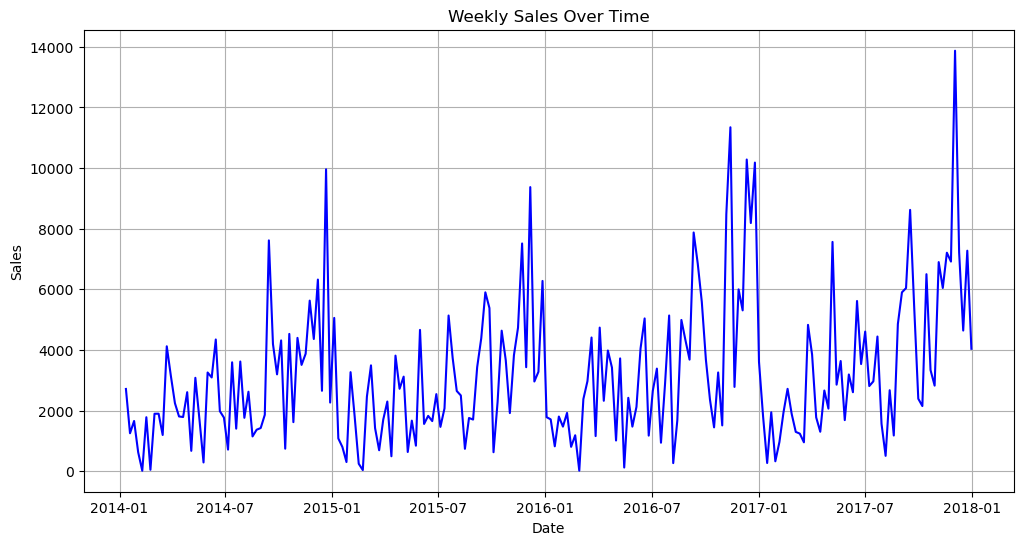

In [12]:
# Plot weekly sales
plt.figure(figsize=(12, 6))
plt.plot(dataset_encode.index, dataset_encode['Sales'], linestyle='-', color='b')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Although the local fluctuation is large, the plot in weekly order has shown a certain regularity in time. Let's plot it in months.

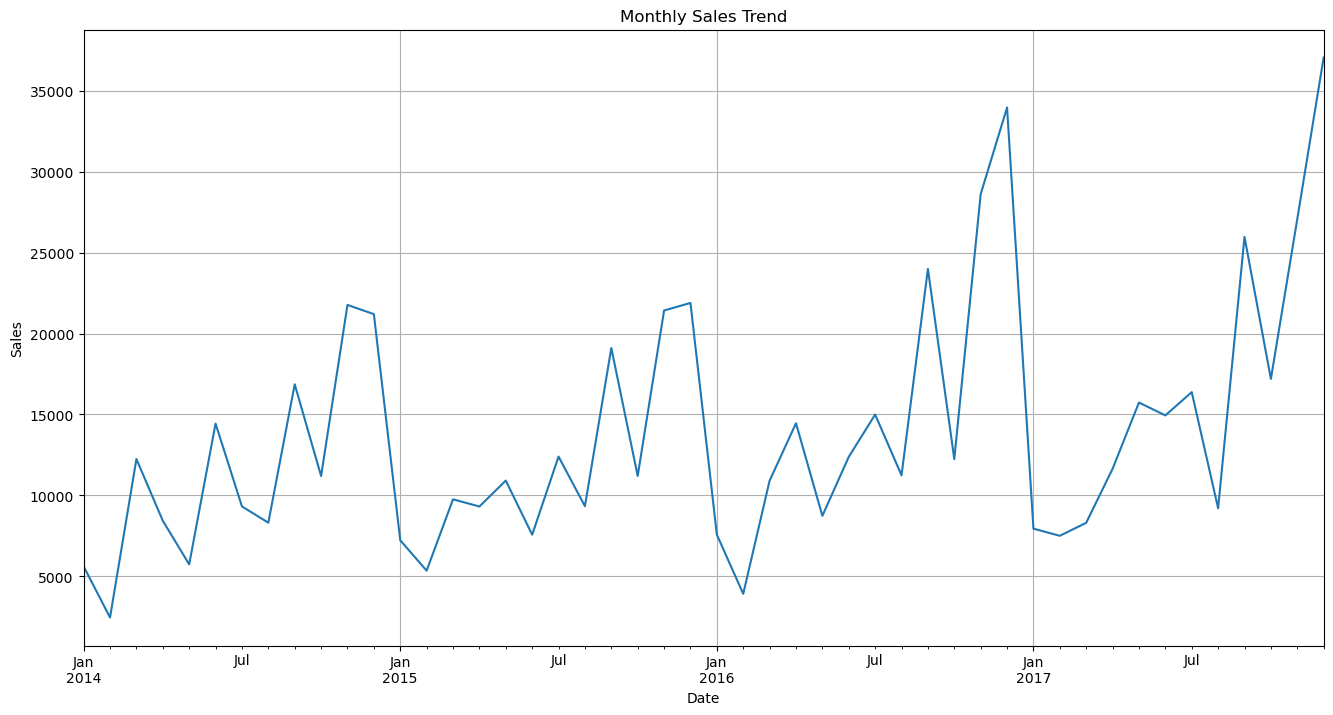

In [13]:
# Aggregate data by month
monthly_sales = dataset_encode['Sales'].resample('ME').sum()

# Plot monthly sales
plt.figure(figsize=(16, 8))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


Clearly, the data shows very good timing. This implies that it is possible to make predictions based on time. Although time does not directly reflect a linear relationship with sales, it can still be used as an indicator of model accuracy.

Since the data set contains only four years of data, and from the image above, the total sales volume does not change much from year to year. So we stopped visualizing sales on a monthly basis.

The next step is to visualize the category features. The tricky thing is, I've consolidated the data on a weekly basis, so it's not possible to visualize sales just by the value of each category variable. Therefore, I took the number of instances of different values of each category variable as a reference indicator and generated the following plot.

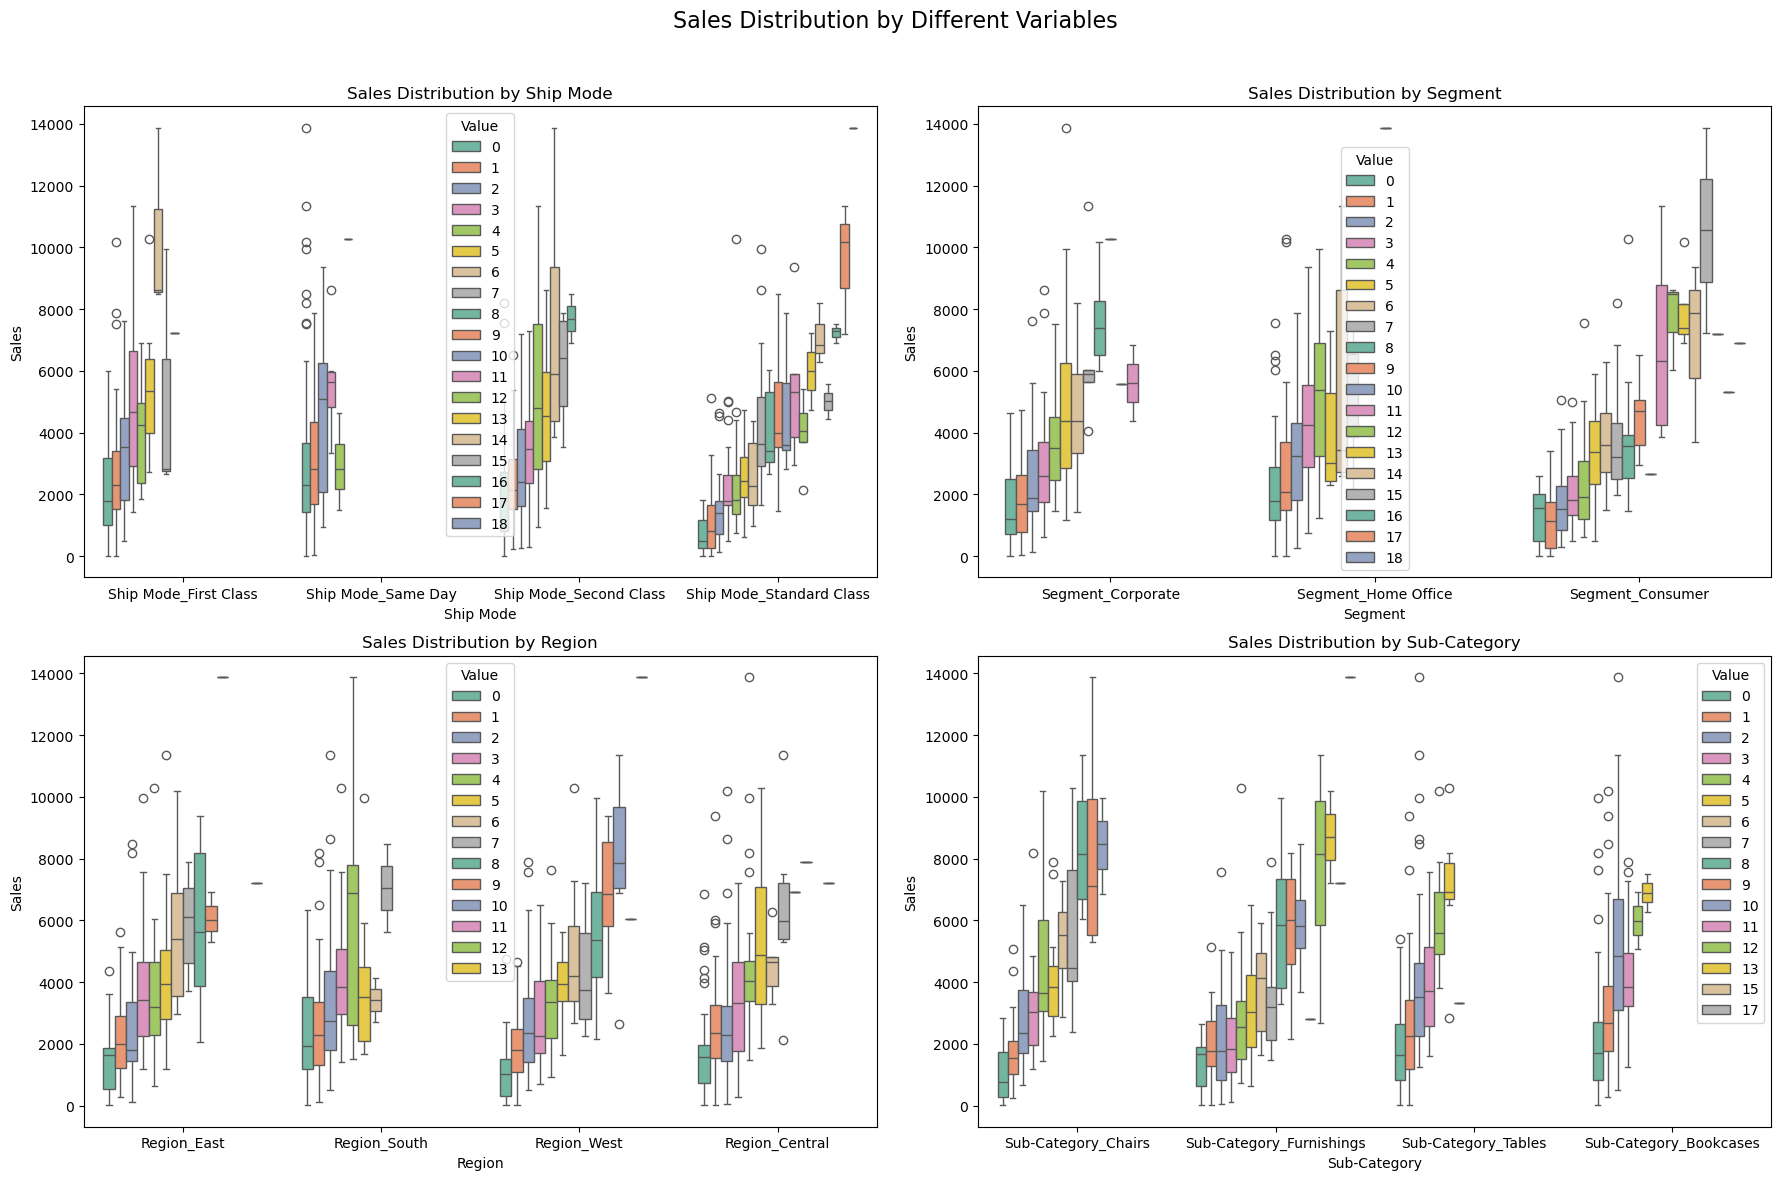

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # Create a 2x2 grid of subplots
fig.suptitle('Sales Distribution by Different Variables', fontsize=16)

# Plot boxplot for Ship Mode
dataset_encode_long = dataset_encode.melt(id_vars=['Sales'], 
                                          value_vars=['Ship Mode_First Class', 'Ship Mode_Same Day', 'Ship Mode_Second Class', 'Ship Mode_Standard Class'],
                                          var_name='Ship Mode',
                                          value_name='Value')

sns.boxplot(x='Ship Mode', y='Sales', data=dataset_encode_long, hue='Value', palette='Set2', ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution by Ship Mode')

# Plot boxplot for Segment
dataset_encode_segment_long = dataset_encode.melt(id_vars=['Sales'], 
                                                  value_vars=['Segment_Corporate', 'Segment_Home Office', 'Segment_Consumer'],
                                                  var_name='Segment',
                                                  value_name='Value')

sns.boxplot(x='Segment', y='Sales', data=dataset_encode_segment_long, hue='Value', palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Sales Distribution by Segment')

# Plot boxplot for Region
dataset_encode_region_long = dataset_encode.melt(id_vars=['Sales'], 
                                                 value_vars=['Region_East', 'Region_South', 'Region_West', 'Region_Central'],
                                                 var_name='Region',
                                                 value_name='Value')

sns.boxplot(x='Region', y='Sales', data=dataset_encode_region_long, hue='Value', palette='Set2', ax=axes[1, 0])
axes[1, 0].set_title('Sales Distribution by Region')

# Plot boxplot for Sub-Category
dataset_encode_subcategory_long = dataset_encode.melt(id_vars=['Sales'], 
                                                      value_vars=['Sub-Category_Chairs', 'Sub-Category_Furnishings', 'Sub-Category_Tables', 'Sub-Category_Bookcases'],
                                                      var_name='Sub-Category',
                                                      value_name='Value')

sns.boxplot(x='Sub-Category', y='Sales', data=dataset_encode_subcategory_long, hue='Value', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Sales Distribution by Sub-Category')

# Adjust subplot spacing automatically
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In the above picture, each subgraph represents a category feature. The different clusters of boxplot within each subgraph represent different values of the category features. In each boxplot cluster, the horizontal coordinate from left to right represents the number of instances where the class feature is the value corresponding to that cluster. The ordinate is the sales of the corresponding instance. Looking at this graph, we can see that sales volume shows a significant difference with the value of each category feature. The overall trend is upward. This difference helps the model predict sales based on the value of the corresponding category.

## 4. Identify correlated variables

The final part of the notebook is to identify correlated variables. I decided to use correlation matrices and heat maps to identify the correlation variables.

                             Sales  Quantity    Profit  Ship Mode_First Class  \
Sales                     1.000000  0.893522  0.347696               0.519154   
Quantity                  0.893522  1.000000  0.286707               0.560198   
Profit                    0.347696  0.286707  1.000000               0.129221   
Ship Mode_First Class     0.519154  0.560198  0.129221               1.000000   
Ship Mode_Same Day        0.286604  0.331353  0.125877               0.137975   
Ship Mode_Second Class    0.555931  0.610399  0.224397               0.291682   
Ship Mode_Standard Class  0.711365  0.803755  0.182852               0.251542   
Segment_Consumer          0.724176  0.836452  0.251069               0.472334   
Segment_Corporate         0.628820  0.682730  0.197265               0.470552   
Segment_Home Office       0.511381  0.536974  0.065543               0.324448   
Region_Central            0.528182  0.562509 -0.006093               0.322702   
Region_East               0.

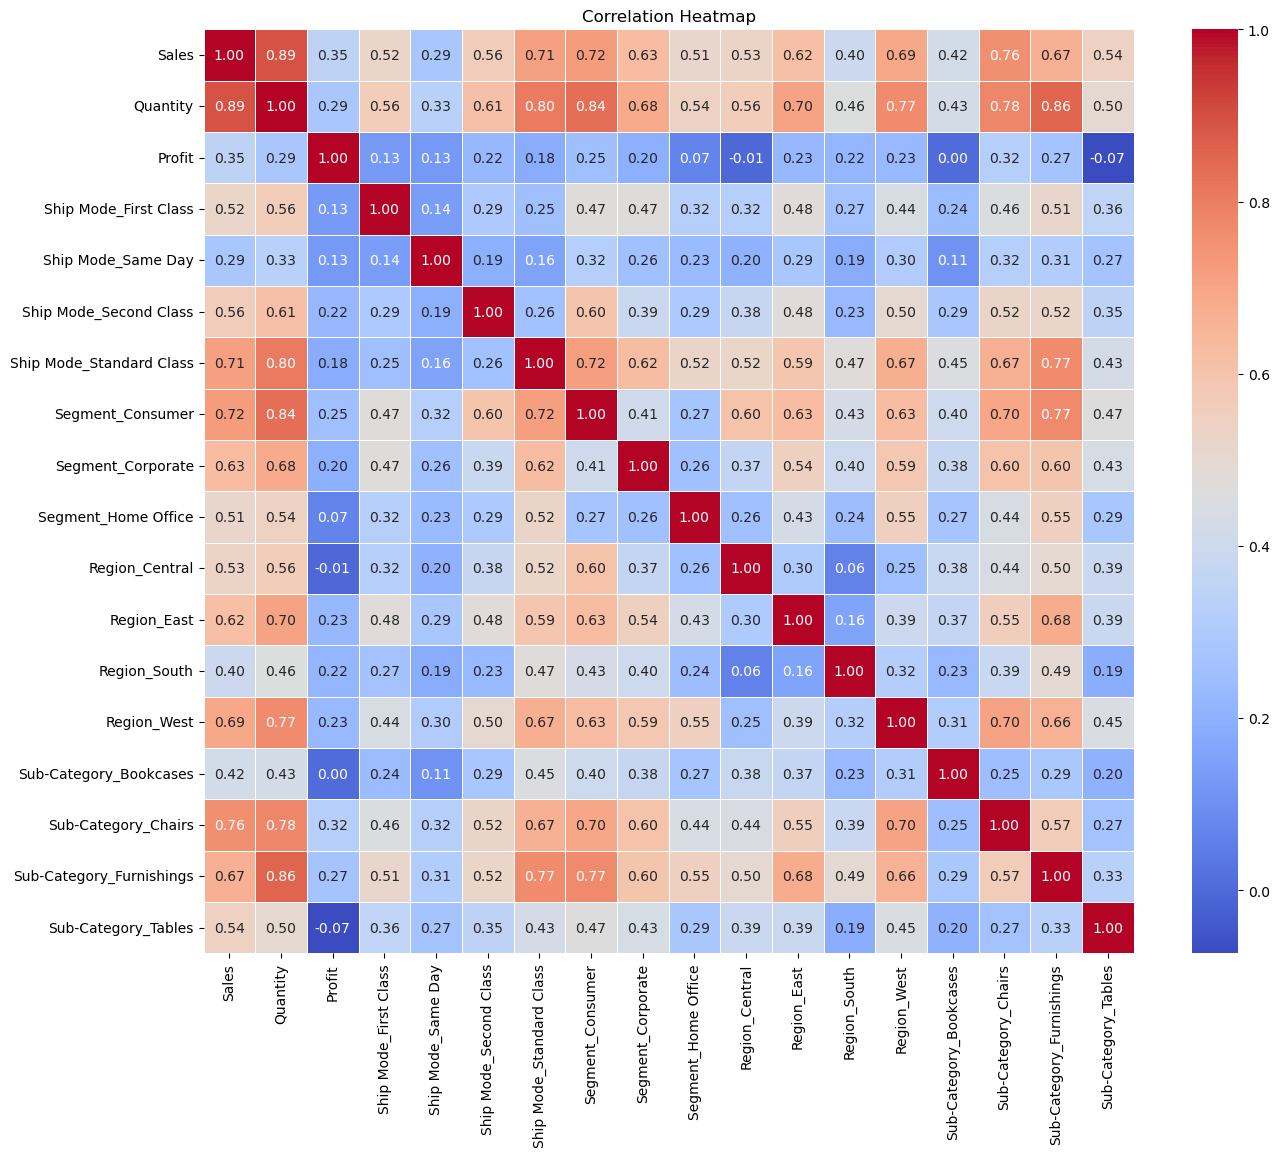

In [15]:
# Calculate the correlation matrices
corr_matrix = dataset_encode.corr()

print(corr_matrix)

plt.figure(figsize=(15, 12))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

The first thing we see from this heat map is that Sales are indeed highly correlated with a number of characteristics. But again, we notice that Quantity also has a high correlation with these features. And it is highly overlapped with Sales. This seems to imply that Quantity has a high multicollinearity. This has a bad effect on the predictive ability and stability of the model. So let's consider deleting this column.

                             Sales    Profit  Ship Mode_First Class  \
Sales                     1.000000  0.347696               0.519154   
Profit                    0.347696  1.000000               0.129221   
Ship Mode_First Class     0.519154  0.129221               1.000000   
Ship Mode_Same Day        0.286604  0.125877               0.137975   
Ship Mode_Second Class    0.555931  0.224397               0.291682   
Ship Mode_Standard Class  0.711365  0.182852               0.251542   
Segment_Consumer          0.724176  0.251069               0.472334   
Segment_Corporate         0.628820  0.197265               0.470552   
Segment_Home Office       0.511381  0.065543               0.324448   
Region_Central            0.528182 -0.006093               0.322702   
Region_East               0.616103  0.226643               0.477641   
Region_South              0.395044  0.217707               0.266104   
Region_West               0.692208  0.229505               0.440528   
Sub-Ca

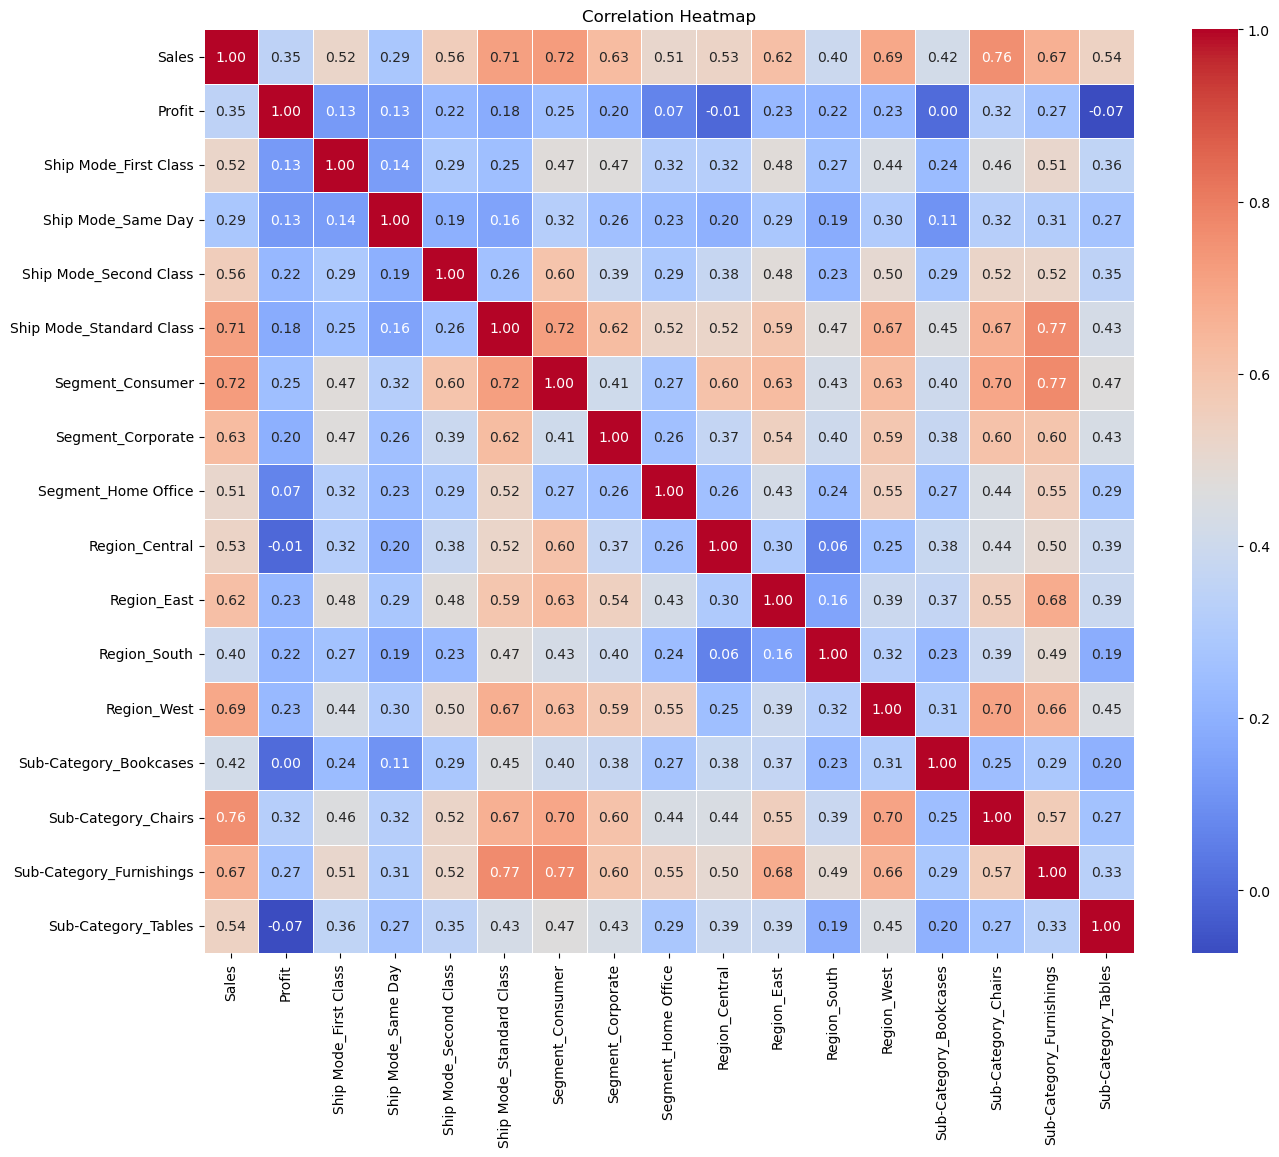

In [16]:
# Form a new dataset without 'Quantity'
dataset_id = dataset_encode.copy()
dataset_id = dataset_id.drop('Quantity', axis=1)

# Same operations for heatmap
corr_matrix_id = dataset_id.corr()

print(corr_matrix_id)

plt.figure(figsize=(15, 12))

sns.heatmap(corr_matrix_id, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

The current data set looks better. The heat map shows that Sales is significantly correlated with most of the features, and even the features with little correlation have a correlation coefficient of more than 0.3. At the same time, we also observe some other potential data relationships, such as Sub-category and Ship Mode, Sub-category and Segment, etc. This may indicate a tendency towards customisation on some orders. However, since the purpose of our model is to estimate Sales, we will not go into too much details.

Finally, let's store the final data set as a csv file.


In [18]:
print(dataset_id.head())

dataset_id.to_csv('dataset_final.csv', index=True)


               Sales    Profit  Ship Mode_First Class  Ship Mode_Same Day  \
Order Date                                                                  
2014-01-12  2712.428  1.634047                      1                   0   
2014-01-19  1250.473 -0.879345                      2                   0   
2014-01-26  1655.958  0.698529                      1                   0   
2014-02-02   623.666 -0.256162                      1                   0   
2014-02-09    14.560 -0.207599                      1                   0   

            Ship Mode_Second Class  Ship Mode_Standard Class  \
Order Date                                                     
2014-01-12                       0                         3   
2014-01-19                       2                         1   
2014-01-26                       1                         7   
2014-02-02                       0                         1   
2014-02-09                       0                         0   

           

## 5. Summary

In summary, the notebook presents the process of transforming a raw data set into a suitable regression machine learning model.

First of all, we had a preliminary understanding of the basic information of the data set through head, info and other methods, learned the data types of each column, and analyzed the numerical class characteristics.

Then, according to the requirements of model development, we integrate the data set on a weekly basis. At the same time, other non-numerical characteristics are treated accordingly. It includes removing meaningless features, classifying categorical features statistically, normalizing values, and storing date information as index.

Next, we visualized all the features that we had not been able to visualize before. The visualized results suggest regular changes in sales over time and changes in sales for different category characteristics. This shows that the values of different categories of features are conducive to the prediction of the model.

Finally, according to the heat map generated by the correlation matrix, we deleted the Quantity columns that might affect the model, and finally got a dataset with better heat map results. The final dataset file is saved as a csv file.

## 6. Something after the Summary

I have to admit that the EDA process took more time and effort than I thought. The biggest challenge implied here is openness. 

In this project, most of the content is completely open. We have no hard and fast standards, and there is no so-called template. The process of processing data and the resulting results are determined by us, and there is no fixed standard. Although there are some methods and indicators to measure the quality of the process, the truth is that more often than not, we make trade-offs. 

Take my own experience as an example. In this project, I chose to conduct data analysis according to the date annotation of the original data at the beginning. However, this brings two problems: First, because the final model requires sales forecast in weeks, it is too detailed and costly to forecast in days. The main thing is the second point: when I did the correlation analysis on a daily basis, I got an "extremely cold" heat map. This suggests that almost all features have little to do with sales, which is a disaster for machine learning. I followed up with simple tests that confirmed this. The R^2 of the linear regression model is close to 0.55. 

So I thought about integrating data on a weekly basis. But this creates new problems. The most obvious problem is the multicollinearity problem, in which Quantity, as a feature with the highest correlation coefficient, shows a surprising consistency with the target variable. This is very bad for the model. So I can only "cut the pain". Preliminary model evaluation showed that the accuracy of the final model was not significantly affected. 

To sum up, I want to express that real world problems are always more complex than books and tutorials, and the trade-off is always more meaningful than the good.